In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

Text(0, 0.5, 'RiverFlow')

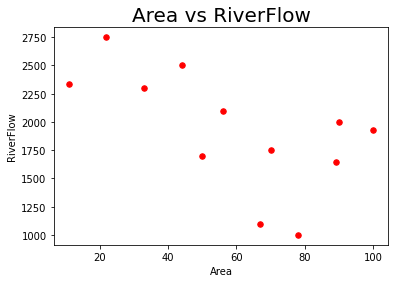

In [4]:
df = pd.read_csv("/content/kernelData.csv")
xtr = df['Area '].values.reshape(1,-1)
ytr = df['RiverFlow'].values.reshape(-1,1)
plt.scatter(xtr,ytr,s = 30,c = 'r')
plt.title("Area vs RiverFlow",fontsize = 20)
plt.xlabel("Area",fontsize = 10)
plt.ylabel("RiverFlow", fontsize = 10)

In [0]:
def InnerProduct(X, Z = np.array([])):
  if Z.size == 0:
    Z = X
  G = np.matmul(X.T,Z)
  return G

In [0]:
def l2distance(X,Z):
  # transpose[ diagonals(S) ] + diagonals(R) + G
  # Where G R and S are:
  # G = X.Z
  # R = Z.Z
  # S = X.X 
  n = X.shape[1]
  m = Z.shape[1]
  D = np.zeros((n,m))
  G = InnerProduct(X,Z)
  S = InnerProduct(X)
  S = np.diag(S).reshape(S.shape[0],1)
  R = np.diag(InnerProduct(Z))
  D = (-2*G + R) + S
  return D

In [0]:
def ridge(D,lamb):
  lamb = lamb* np.eye(D.shape[0],D.shape[1])
  lamb = lamb + D
  return lamb

In [0]:
def kernel(xtr,xte,gamma = 1):
  # xtr : dxn | n vectors of d dim
  # ytr : nx1 labels for n vectors 
  D = l2distance(xtr,xte)
  D = (-1/(2*gamma**2))*D
  D = np.exp(D)
  return D


In [0]:
def kregression(xtr, ytr, gamma = 1, lamb = 0.1):
  # xtr : 2xn | d==2
  # ytr : nx1 | label for n vectors
  # gamma for kernel
  # lamb for ridge regression
  # kernel * alpha  = ytr
  D = kernel(xtr, xtr, gamma)
  D = ridge(D,lamb)
  D = np.round(D,3)
  alpha = np.linalg.solve(D,ytr)
  return alpha

In [0]:
def predict(alpha,xtr,xte,gamma):
  # alpha : nx1
  # xtr : dxn
  # xte : dxm
  value = np.matmul(alpha.T,kernel(xtr,xte,gamma))
  return value
  

In [0]:
def scaling(xtr):
  mini = xtr.min(axis = 0)
  maxi = xtr.max(axis = 0)
  den = maxi - mini
  xtr = xtr-mini
  xtr = xtr/den
  return xtr

In [92]:
# xtr : 1xn
# ytr : nx1
alpha = kregression(xtr,ytr, gamma = 10, lamb = 0.)
#print(alpha)
pred = predict(alpha,xtr,xtr,gamma = 10)
print("predicted:",pred)

predicted: [[2300.1425028  2767.75892541 2332.12277655 2436.93869243 2158.39865986
  1123.40627903 1081.30683725 1764.15613548 1964.65129322 1962.08153883
  1765.65709351 2081.77653745]]


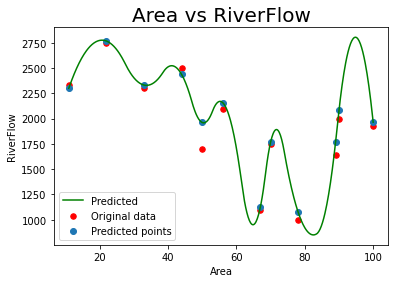

In [93]:
xnew = np.linspace(xtr.min(),xtr.max(),500)
f = interp1d(xtr.reshape(-1), pred.reshape(-1),kind = 'quadratic')
y_smooth=f(xnew)
plt.plot(xnew.reshape(-1),y_smooth.reshape(-1),c= 'g',label = "Predicted")
plt.scatter(xtr,ytr,s = 30,c = 'r',label = "Original data")
plt.scatter( xtr.reshape(-1), pred.reshape(-1),label = "Predicted points")
plt.title("Area vs RiverFlow",fontsize = 20)
plt.xlabel("Area",fontsize = 10)
plt.ylabel("RiverFlow", fontsize = 10)
plt.legend()

### With Ridge Regression

In [0]:
# xtr : 1xn
# ytr : nx1
alpha1 = kregression(xtr,ytr, gamma = 10, lamb = 0.2)
pred1 = predict(alpha1,xtr,xtr,gamma = 10)

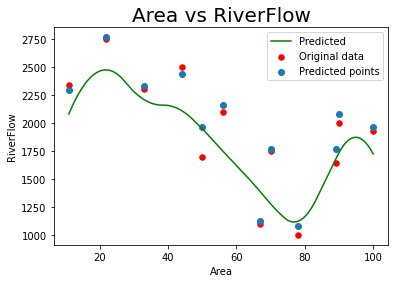

In [95]:
xnew = np.linspace(xtr.min(),xtr.max(),500)
f = interp1d(xtr.reshape(-1), pred1.reshape(-1),kind = 'quadratic')
y_smooth=f(xnew)
plt.plot(xnew.reshape(-1),y_smooth.reshape(-1),c= 'g',label = "Predicted")
plt.scatter(xtr,ytr,s = 30,c = 'r',label = "Original data")
plt.scatter( xtr.reshape(-1), pred.reshape(-1),label = "Predicted points")
plt.title("Area vs RiverFlow",fontsize = 20)
plt.xlabel("Area",fontsize = 10)
plt.ylabel("RiverFlow", fontsize = 10)
plt.legend()